In [3]:
from IPython.display import Image

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# [1차] 비밀지도

- 프로그래머스 2018 KAKAO BLIND RECRUITMENT 문제
- **2진법 문제**
- 링크: https://programmers.co.kr/learn/courses/30/lessons/17681

# 문제 설명

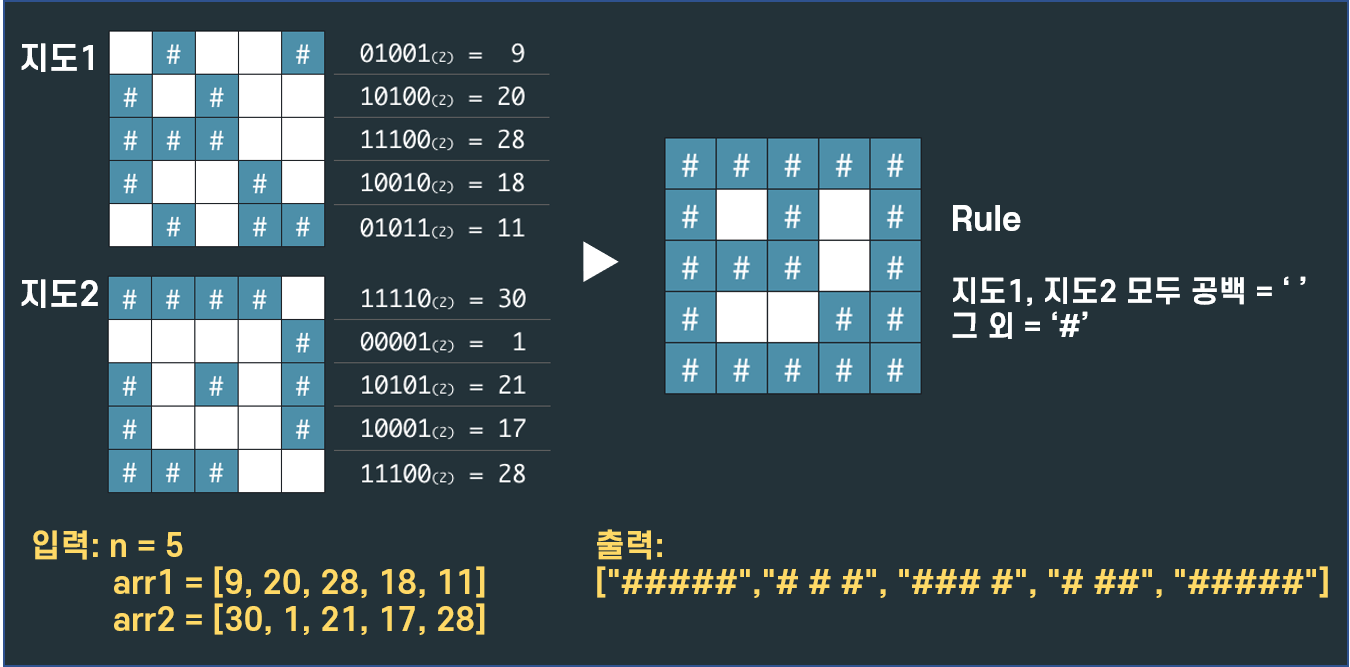

In [10]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/1-summary.png", height=400)

<정리>

지도 한 변의 크기인 n이 주어지고

arr1, arr2에 n개의 숫자가 들어오는데, 각 숫자를 2진법으로 바꾸어 n자리로 나타내면 지도를 만들 수 있다.

이 두 지도를 이용하여 같은 위치에 있는 숫자를 통해 결론적으로 비밀지도를 얻을 수 있는데, 2진법은 각 자리에 0과 1 둘 중 하나이고, 두 지도가 모두 0이면 공백 ' '을 그게 아니라면 '#'을 출력하여 리스트로 반환한다.


<br>
<br>
<br>





# 코드 1
- 라이브러리 및 함수 사용 최소화

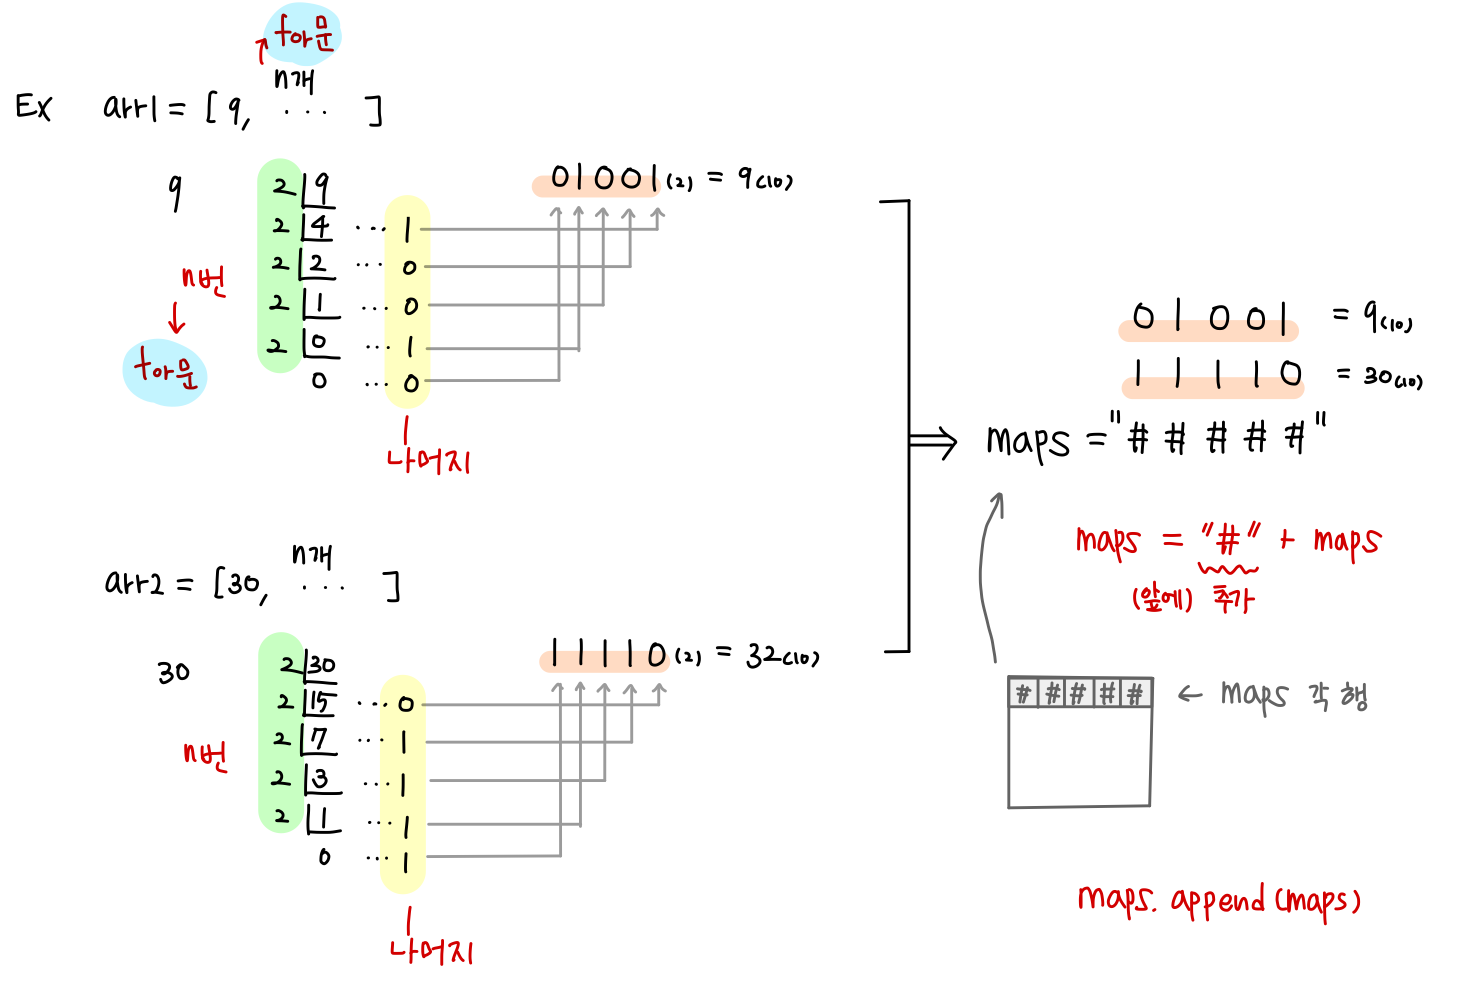

In [19]:
Image("/content/gdrive/My Drive/스터디-알고리즘/_Data/1-code.png", height=400)

1. 예를 들어 9를 이진법으로 바꿀 때, 2로 나눠서 나오는 나머지를 n번 구하는데, 구한 후에 현재 리스트의 맨 앞에 추가해야 함
2. arr1, 2의 원소 개수만큼 n번, 2진수를 구하기 위해 나누기 n번 해서 총 2개의 for문 필요
3. 최종 비밀지도의 각 행을 maps라는 변수로 나타냄, 즉 if 문에서 나머지가 0으로 동일할 때 공백 추가, 아니면 #을 추가하여 for문을 돌아 한 행 지도가 maps에 들어오고 이를 최종 답인 answer에 append해서 list로 출력

In [16]:
def solution(n, arr1, arr2):
    answer = []
    for i in range(len(arr1)): # 행 접근
        maps = ""; 
        a1 = arr1[i]; # 지도1 한 행, 몫
        a2 = arr2[i]; # 지도2 한 행, 몫
        
        for j in range(len(arr1)): # 각 행의 2진수
            if (a1%2 == 0) & (a2%2 == 0):
                maps = " " + maps # 맨 앞에 추가
            else:
                maps = "#" + maps # 맨 앞에 추가
            a1 = a1//2; a2 = a2//2 # 몫 업데이트

        answer.append(maps)
    return answer

- 코드 TEST 1

In [17]:
n = 5
arr1 = [9, 20, 28, 18, 11]
arr2 = 	[30, 1, 21, 17, 28]

solution(n, arr1, arr2)
# 정답: ["#####","# # #", "### #", "# ##", "#####"]

['#####', '# # #', '### #', '#  ##', '#####']

- 코드 TEST 2

In [18]:
n = 6
arr1 = [46, 33, 33 ,22, 31, 50]
arr2 = 	[27 ,56, 19, 14, 14, 10]

solution(n, arr1, arr2)
# 정답: ["######", "### #", "## ##", " #### ", " #####", "### # "]

['######', '###  #', '##  ##', ' #### ', ' #####', '### # ']

<br>
<br>
<br>





# 코드 2
- 라이브러리 및 함수 사용, 파이썬 특화

In [27]:
arr1 = [9, 10]
arr2 = [2, 3]
print([[i,j] for i,j in zip(arr1, arr2)])

[[9, 2], [10, 3]]


In [35]:
bin(9)

'0b1001'

In [28]:
'100'.rjust(5, '0')

'00100'

1. zip 함수를 이용해서 arr1, arr2 list의 원소를 하나씩 꺼냄
2. bin(i|j)를 이용해서 i, j를 2진수 변환 후 or로 비교한 결과로 한 행의 결과가 나옴

  *그 외에도 8, 16진수로 변환해주는 oct(), hex() 함수도 존재, int(숫자, 진수)도 가능
3. rjust를 이용하여 필요한 경우 n을 추가하여 n자리로 만들어줌

In [ ]:
def solution(n, arr1, arr2):
    answer = []
    for i,j in zip(arr1,arr2):
        a12 = str(bin(i|j)[2:])
        a12 = a12.rjust(n,'0')
        a12 = a12.replace('1','#')
        a12 = a12.replace('0',' ')
        answer.append(a12)
    return answer

- 코드 TEST 1

In [20]:
n = 5
arr1 = [9, 20, 28, 18, 11]
arr2 = 	[30, 1, 21, 17, 28]

solution(n, arr1, arr2)
# 정답: ["#####","# # #", "### #", "# ##", "#####"]

['#####', '# # #', '### #', '#  ##', '#####']

- 코드 TEST 2

In [21]:
n = 6
arr1 = [46, 33, 33 ,22, 31, 50]
arr2 = 	[27 ,56, 19, 14, 14, 10]

solution(n, arr1, arr2)
# 정답: ["######", "### #", "## ##", " #### ", " #####", "### # "]

['######', '###  #', '##  ##', ' #### ', ' #####', '### # ']